In [1]:
%matplotlib inline


# Heat diffusion

Solve the heat equation by filtering the initial conditions with the heat
kernel :class:`pygsp.filters.Heat`.


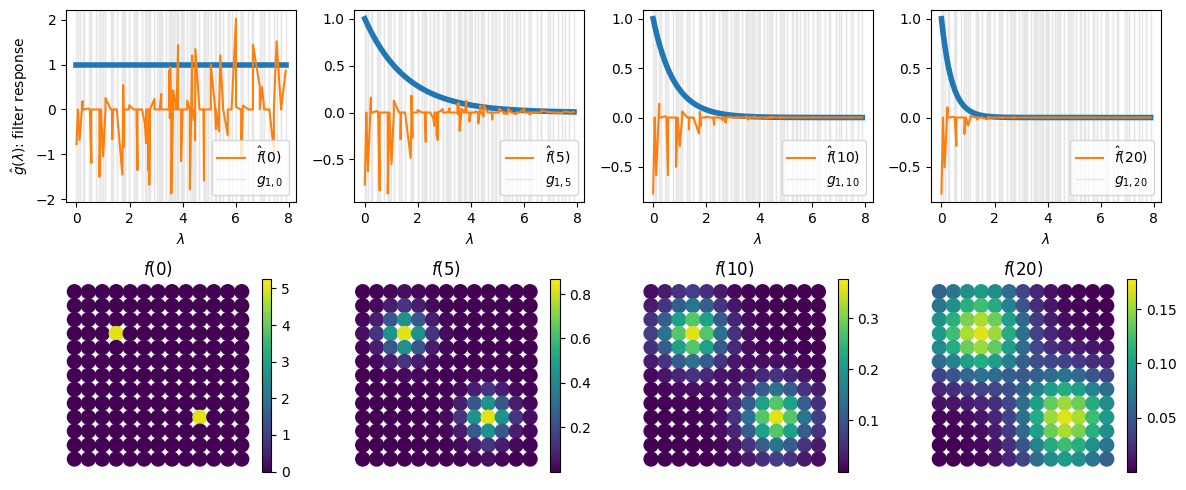

In [12]:
from os import path

import numpy as np
from matplotlib import pyplot as plt
import pygsp as pg

n_side = 13
G = pg.graphs.Grid2d(n_side)
G.compute_fourier_basis()

sources = [
    (n_side//4 * n_side) + (n_side//4),
    (n_side*3//4 * n_side) + (n_side*3//4),
]
x = np.zeros(G.N)
x[sources] = 5

times = [0, 5, 10, 20]

fig, axes = plt.subplots(2, len(times), figsize=(12, 5))
for i, t in enumerate(times):
    g = pg.filters.Heat(G, tau=t)
    title = r'$\hat{{f}}({0}) = g_{{1,{0}}} \odot \hat{{f}}(0)$'.format(t)
    g.plot(ax=axes[0, i])
    axes[0, i].set_xlabel(r'$\lambda$')
#    axes[0, i].set_ylabel(r'$g(\lambda)$')
    if i > 0:
        axes[0, i].set_ylabel('')
    y = g.filter(x)
    line, = axes[0, i].plot(G.e, G.gft(y))
    labels = [r'$\hat{{f}}({})$'.format(t), r'$g_{{1,{}}}$'.format(t)]
    axes[0, i].legend([line, axes[0, i].lines[-3]], labels, loc='lower right')
    # Assuming G is your Graph object and y is the signal you want to plot
    G.plot_signal(y, ax=axes[1, i], plot_name=r'$f({})$'.format(t))
    axes[1, i].set_aspect('equal', 'box')
    axes[1, i].set_axis_off()

fig.tight_layout()